In [1]:
import __init__
import matplotlib.pyplot as plt
import numpy as np
from dce import DCE

Using TensorFlow backend.


### Visualize the hardening function 

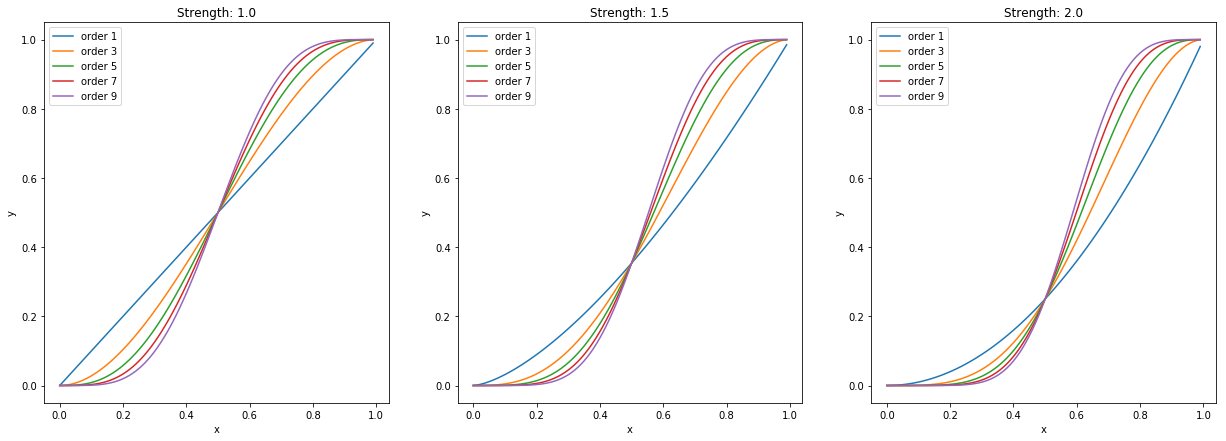

In [2]:
fig, axes = plt.subplots(1,3,figsize=(21,7))

x = np.arange(0,1,0.01)
strength = [1.0, 1.5, 2.0]
for i in range(len(strength)):
    for j in DCE.HARDENING_FUNCS.keys():
        y = DCE.HARDENING_FUNCS[j](x) ** strength[i]
        axes[i].plot(x, y, label='order ' + str(j))
    axes[i].set_title('Strength: ' + str(strength[i]))
    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

### Creat Random data

In [3]:
a_0 = np.random.random(size=100)
a_1 = np.random.random(size=100)
a_2 = np.random.random(size=100)

a_01 = a_0 + a_1
q_2 = np.array([a_0/a_01, a_1/a_01]).T

a_012 = a_01 + a_2
q_3 = np.array([a_0/a_012, a_1/a_012, a_2/a_012]).T

### Cluster = 2 

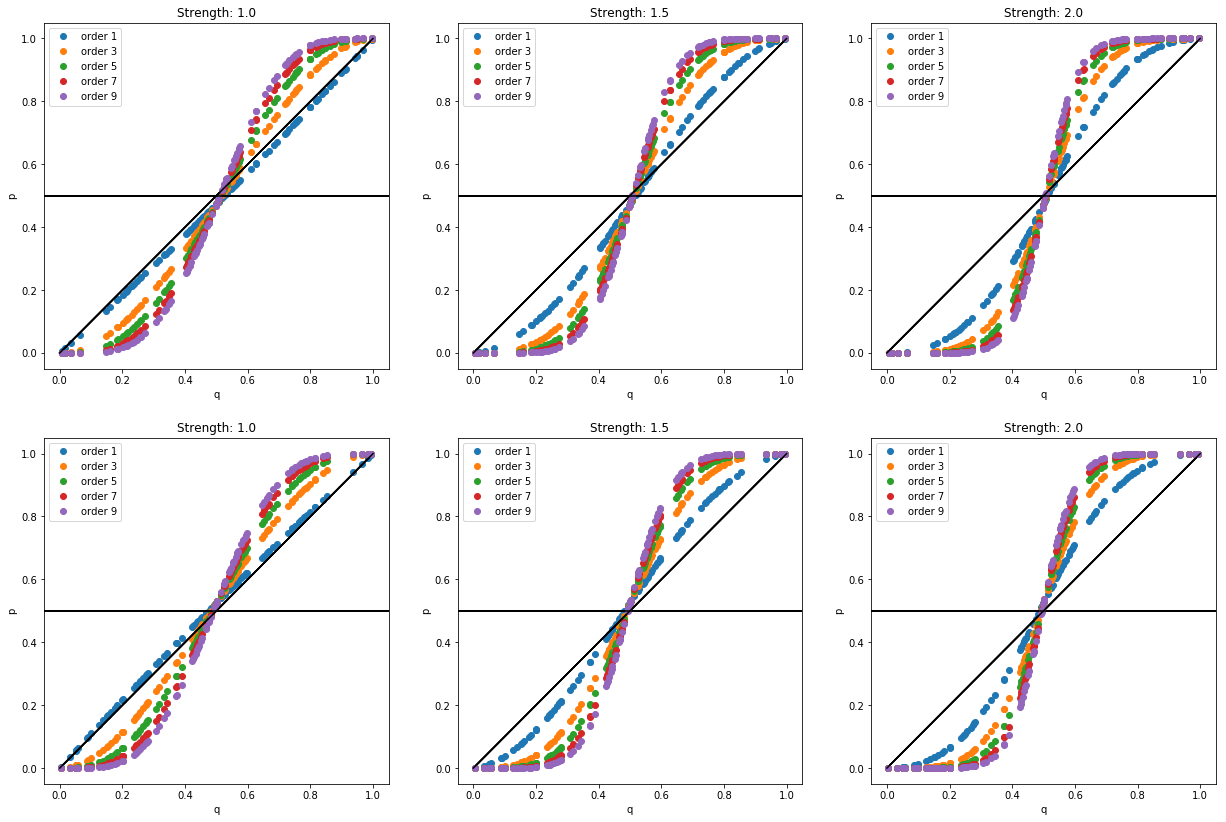

In [4]:
strength = [1.0, 1.5, 2.0]
fig, axes = plt.subplots(2,3,figsize=(21,14))

for i in range(len(strength)):
    for order, h_func in DCE.HARDENING_FUNCS.items():
        p = DCE.hardening(q_2, h_func, strength[i])
        
        for j in range(2):
            axes[j][i].plot(q_2.T[j],p.T[j], 'o', label='order ' + str(order))
            axes[j][i].axhline(0.5, c='k')
            axes[j][i].plot([0,1],[0,1],c='k')
            axes[j][i].set_title('Strength: ' + str(strength[i]))
            axes[j][i].legend()
            axes[j][i].set_xlabel('q')
            axes[j][i].set_ylabel('p')


### Cluster = 3 

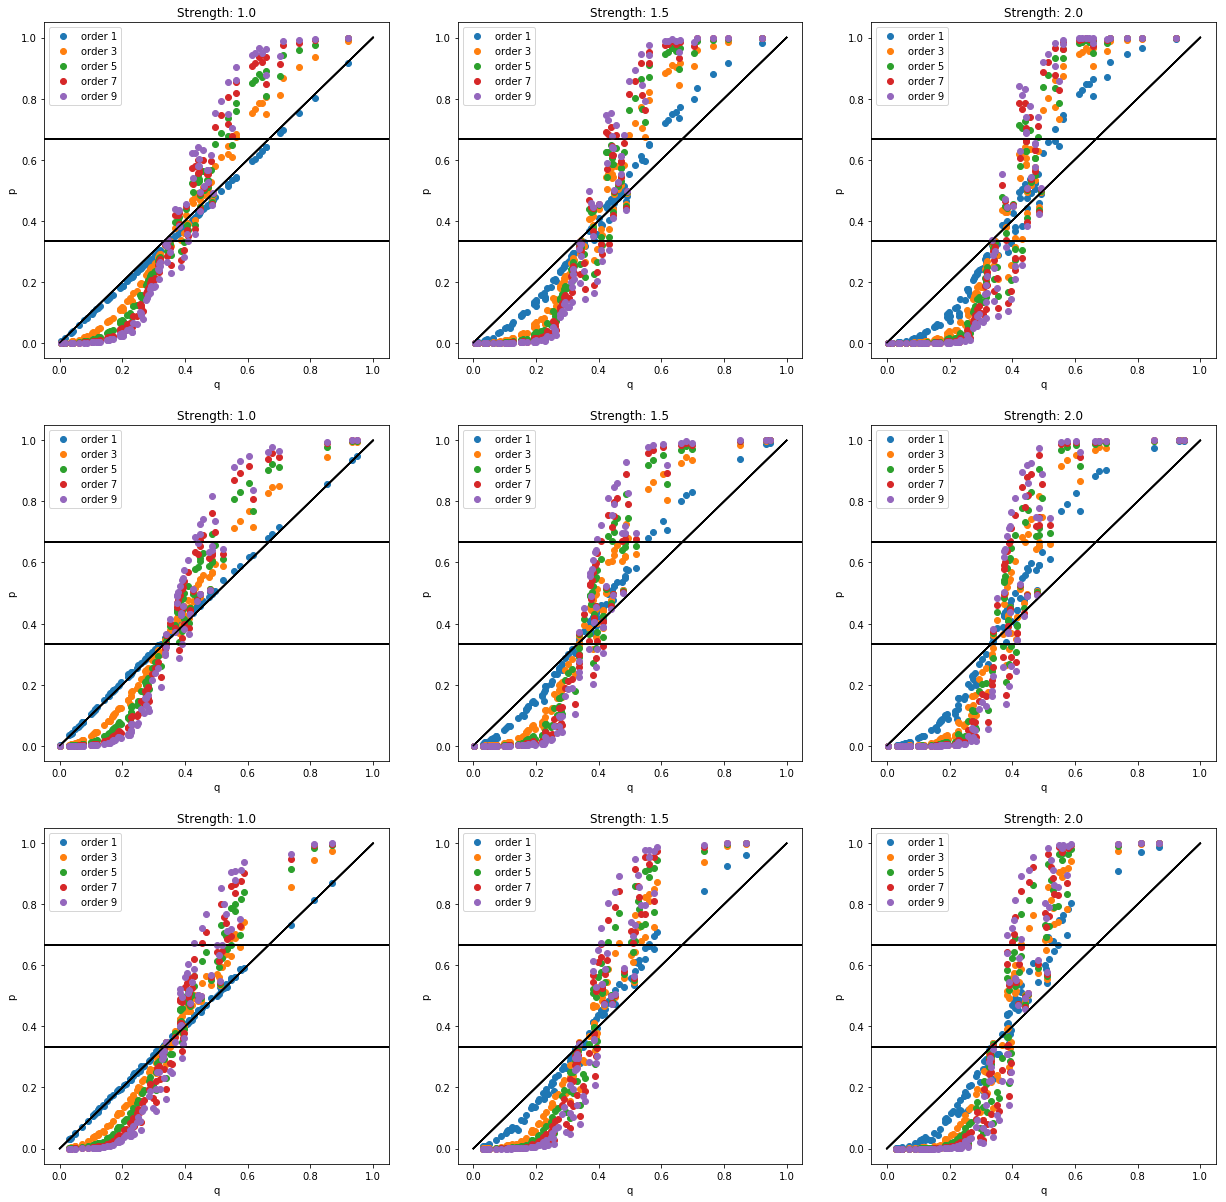

In [5]:
strength = [1.0, 1.5, 2.0]
fig, axes = plt.subplots(3,3,figsize=(21,21))

for i in range(len(strength)):
    for order, h_func in DCE.HARDENING_FUNCS.items():
        p = DCE.hardening(q_3, h_func, strength[i])
        
        for j in range(3):
            axes[j][i].plot(q_3.T[j],p.T[j], 'o', label='order ' + str(order))
            axes[j][i].axhline(0.333333, c='k')
            axes[j][i].axhline(0.666667, c='k')
            axes[j][i].plot([0,1],[0,1],c='k')
            axes[j][i].set_title('Strength: ' + str(strength[i]))
            axes[j][i].legend()
            axes[j][i].set_xlabel('q')
            axes[j][i].set_ylabel('p')

### Comparisons in cluster = 3

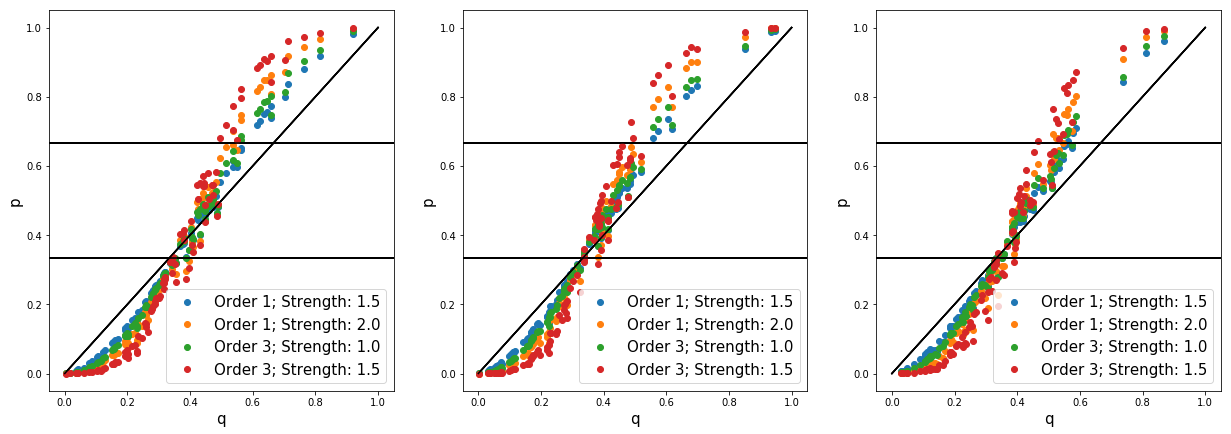

In [6]:
fig, axes = plt.subplots(1,3,figsize=(21,7))

o_s = [[1, 1.5],
       [1, 2.0],
       [3, 1.0],
       [3, 1.5]]

for i in range(len(o_s)):
    order = o_s[i][0] 
    strength = o_s[i][1] 
    h_func = DCE.HARDENING_FUNCS[order]
    p = DCE.hardening(q_3, h_func, strength)

    for j in range(3):
        axes[j].plot(q_3.T[j],p.T[j], 'o', label='Order ' + str(order) + '; Strength: ' + str(strength))
        axes[j].axhline(0.333333, c='k')
        axes[j].axhline(0.666667, c='k')
        axes[j].plot([0,1],[0,1],c='k')
        axes[j].legend(fontsize=15)          
        axes[j].set_xlabel('q', fontsize=15)
        axes[j].set_ylabel('p', fontsize=15)
